0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: 0, Length: 60000, dtype: int64
       1    2    3    4    5    6    7    8    9    10   ...  775  776  777  \
0        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4        0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59995    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59996    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59997    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
59998    0    0    0    0    0    0    0    0    0  

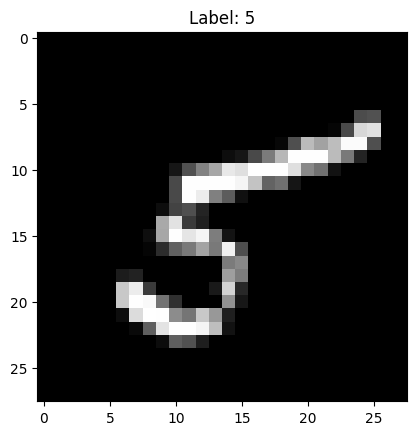

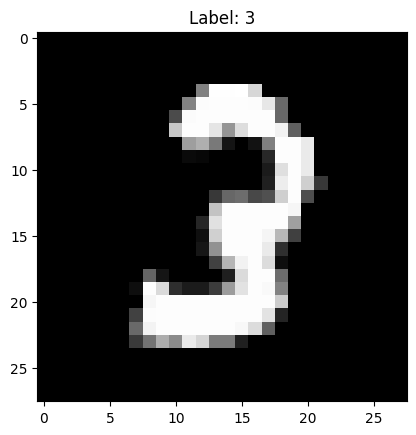

tensor([5, 0, 4,  ..., 5, 6, 8])


In [28]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import torchvision.transforms as transforms
from PIL import Image
class PreProcessData:
    def __init__(self,input_test_data,input_train_data):
        self.test_data = pd.read_csv(input_test_data,header=None)
        self.train_data = pd.read_csv(input_train_data,header=None)
        self.test_labels = None
        self.test_pixels = None
        self.train_labels = None
        self.train_pixels = None
    def readData(self):
        self.test_labels = self.test_data.iloc[:,0]
        self.test_pixels = self.test_data.iloc[:,1:]
        self.train_labels = self.train_data.iloc[:,0]
        self.train_pixels = self.train_data.iloc[:,1:]
        print(self.train_labels)
        print(self.train_pixels)
        print(self.test_labels)
        print(self.test_pixels)        
    def dataToNumpy(self):
        self.test_labels = self.test_labels.to_numpy()
        self.test_pixels = self.test_pixels.to_numpy()
        self.train_labels = self.train_labels.to_numpy()
        self.train_pixels = self.train_pixels.to_numpy()
        return self.test_labels, self.test_pixels, self.train_labels, self.train_pixels
    def numpyToTensor(self):
        transform = transforms.Compose([
            transforms.RandomRotation(5),
            transforms.ToTensor()
        ])
       # 處理訓練集
        augmented_train_pixels = []
        for image in self.train_pixels:
            pil_image = Image.fromarray(image.reshape(28, 28).astype('uint8'))  # 將 numpy 陣列轉換為 PIL 圖片
            augmented_image = transform(pil_image)  # 應用資料擴增並轉為張量
            augmented_train_pixels.append(augmented_image)
        self.train_pixels = torch.stack(augmented_train_pixels)  # 將擴增後的圖片合併成張量
        self.train_labels = torch.tensor(self.train_labels, dtype=torch.long)

        # 處理測試集
        augmented_test_pixels = []
        for image in self.test_pixels:
            pil_image = Image.fromarray(image.reshape(28, 28).astype('uint8'))
            augmented_image = transform(pil_image)
            augmented_test_pixels.append(augmented_image)
        self.test_pixels = torch.stack(augmented_test_pixels)
        self.test_labels = torch.tensor(self.test_labels, dtype=torch.long)


        return self.test_labels, self.test_pixels, self.train_labels, self.train_pixels
    def getShape(self):
        print(self.test_labels.shape, self.test_pixels.shape, self.train_labels.shape, self.train_pixels.shape)
    def showImage(self):
        random_index = random.randint(0, self.train_pixels.shape[0])
        image = self.train_pixels[random_index].reshape(28, 28)
        plt.imshow(image, cmap='gray')
        plt.title(f'Label: {self.train_labels[random_index]}')
        plt.show()
        return image
    def showAugmentedImage(self):
        random_index = random.randint(0, self.train_pixels.shape[0])
        image = self.train_pixels[random_index].reshape(28, 28)
        plt.imshow(image, cmap='gray')
        plt.title(f'Label: {self.train_labels[random_index]}')
        plt.show()
        return image

data = PreProcessData('./mnist/mnist_test.csv', './mnist/mnist_train.csv')
data.readData()
data.dataToNumpy()
data.numpyToTensor()
data.getShape()
data.showImage()
X_train = data.train_pixels 
y_train = data.train_labels
X_test = data.test_pixels
y_test = data.test_labels
data.showAugmentedImage()
print(y_train)



    


In [29]:
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
class DataPackage:
    def __init__(self):
        self.trainDataSet = None
        self.testDataSet = None
        self.trainDataLoader = None
        self.testDataLoader = None
    def toDataSet(self, X_train, X_test, y_train, y_test):
        self.trainDataSet = TensorDataset(X_train, y_train)
        self.testDataSet = TensorDataset(X_test, y_test)
        return self.trainDataSet, self.testDataSet
    def toDataLoader(self, trainDataSet, testDataSet):
        self.trainDataLoader = DataLoader(trainDataSet, batch_size=32, shuffle=True)
        self.testDataLoader = DataLoader(testDataSet, batch_size=32, shuffle=False)
        return self.trainDataLoader, self.testDataLoader
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dataPackage = DataPackage()
trainDataSet, testDataSet = dataPackage.toDataSet(X_train, X_test, y_train, y_test)
trainDataLoader, testDataLoader = dataPackage.toDataLoader(trainDataSet, testDataSet)
for i in enumerate(trainDataLoader):
    print(i)
    break





(0, [tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..

Epoch 1/30, Train Loss: 0.0588, Test Loss: 0.0372, Train Accuracy: 51.73%, Test Accuracy: 77.19%
Epoch 2/30, Train Loss: 0.0262, Test Loss: 0.0193, Train Accuracy: 81.30%, Test Accuracy: 84.15%
Epoch 3/30, Train Loss: 0.0174, Test Loss: 0.0152, Train Accuracy: 85.39%, Test Accuracy: 86.47%
Epoch 4/30, Train Loss: 0.0147, Test Loss: 0.0134, Train Accuracy: 87.18%, Test Accuracy: 87.60%
Epoch 5/30, Train Loss: 0.0133, Test Loss: 0.0124, Train Accuracy: 88.10%, Test Accuracy: 88.65%
Epoch 6/30, Train Loss: 0.0124, Test Loss: 0.0117, Train Accuracy: 88.84%, Test Accuracy: 89.17%
Epoch 7/30, Train Loss: 0.0118, Test Loss: 0.0111, Train Accuracy: 89.47%, Test Accuracy: 89.90%
Epoch 8/30, Train Loss: 0.0112, Test Loss: 0.0106, Train Accuracy: 89.94%, Test Accuracy: 90.18%
Epoch 9/30, Train Loss: 0.0108, Test Loss: 0.0102, Train Accuracy: 90.30%, Test Accuracy: 90.64%
Epoch 10/30, Train Loss: 0.0104, Test Loss: 0.0099, Train Accuracy: 90.66%, Test Accuracy: 90.81%
Epoch 11/30, Train Loss: 0.01

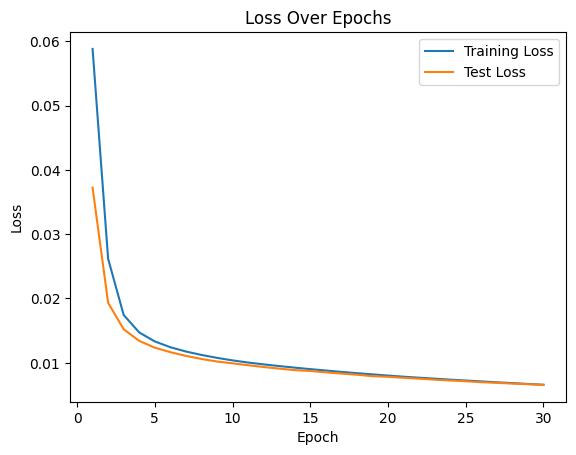

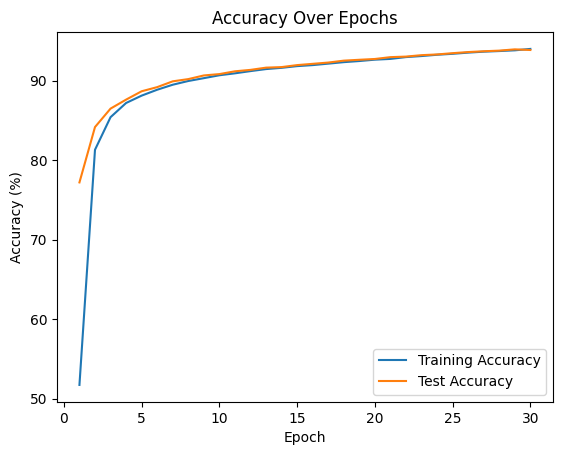

In [34]:
import torch.nn as nn
import torch.optim as optim 
import torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR
class MyDNNModel(nn.Module):
    def __init__(self):
        super(MyDNNModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.2)
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        dropout = nn.Dropout(0.2)
        x = self.fc4(x)
        return x
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MyDNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001, weight_decay=1e-5)
scheduler = StepLR(optimizer, step_size=10, gamma=0.9)
class ModelTrainer:
    def __init__(self, model, criterion, optimizer, train_loader, test_loader):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.train_losses = []
        self.test_losses = []
        self.train_accuracies = []
        self.test_accuracies = []

    def train(self, epochs):
        for epoch in range(epochs):
            train_loss, train_correct = 0, 0
            test_loss, test_correct = 0, 0

            # Training phase
            self.model.train()
            for data, target in self.train_loader:
                data =data.view(-1, 28*28)
                data, target = data.to(device), target.to(device)
                self.optimizer.zero_grad()
                output = self.model(data)
                loss = self.criterion(output, target)
                loss.backward()
                self.optimizer.step()
                train_loss += loss.item()
                pred = output.argmax(dim=1, keepdim=True)
                train_correct += pred.eq(target.view_as(pred)).sum().item()
            scheduler.step()

            # Testing phase
            self.model.eval()
            with torch.no_grad():
                for data, target in self.test_loader:
                    data, target = data.to(device), target.to(device)
                    output = self.model(data)
                    loss = self.criterion(output, target)
                    test_loss += loss.item()
                    pred = output.argmax(dim=1, keepdim=True)
                    test_correct += pred.eq(target.view_as(pred)).sum().item()

            train_loss /= len(self.train_loader.dataset)
            test_loss /= len(self.test_loader.dataset)
            train_accuracy = 100. * train_correct / len(self.train_loader.dataset)
            test_accuracy = 100. * test_correct / len(self.test_loader.dataset)

            self.train_losses.append(train_loss)
            self.test_losses.append(test_loss)
            self.train_accuracies.append(train_accuracy)
            self.test_accuracies.append(test_accuracy)

            print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')
    def finalAccuracy(self):
        print(f'Final Training Accuracy: {self.train_accuracies[-1]:.2f}%')
        print(f'Final Test Accuracy: {self.test_accuracies[-1]:.2f}%')
    def plot_losses(self):
        epochs = range(1, len(self.train_losses) + 1)
        plt.figure()
        plt.plot(epochs, self.train_losses, label="Training Loss")
        plt.plot(epochs, self.test_losses, label="Test Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title("Loss Over Epochs")
        plt.legend()
        plt.show()

    def plot_accuracies(self):
        epochs = range(1, len(self.train_accuracies) + 1)
        plt.figure()
        plt.plot(epochs, self.train_accuracies, label="Training Accuracy")
        plt.plot(epochs, self.test_accuracies, label="Test Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy (%)")
        plt.title("Accuracy Over Epochs")
        plt.legend()
        plt.show()
trainer = ModelTrainer(model, criterion, optimizer, trainDataLoader, testDataLoader)
trainer.train(30)
trainer.finalAccuracy()
trainer.plot_losses()
trainer.plot_accuracies()











In [31]:
from ipywidgets import interact_manual
def test(測試編號):
    y_predict = model(X_test[測試編號].view(1, 28*28).to(device)).argmax().item()
    plt.imshow(X_test[測試編號].view(28, 28).cpu().numpy(), cmap='gray')
    plt.title(f'Predict: {y_predict}')
    plt.show()
interact_manual(test, 測試編號=(0, len(X_test)-1))


interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>